# Reproduction of model 'k' - best one of my ProtoNets

1. Run `python k_train.py`, will take one day.
2. Run `python k_tta.py`, will take about an hour. This will make TTA results.
3. Run followings to visualize and submit.

This marked LB score: Private/Public = 0.88599/0.87523

In [1]:
from dlcliche.notebook import *
from whale_plus_utils import *
from config import DATA_PATH
! ls results

prototypes_k_k60_epoch600.npy	   test_dists_PTA_k_k60_epoch600.npy
prototypes_PTA_k_k60_epoch600.npy  test_dists_PTTA_k_k60_epoch600.npy
test_dists_k_k60_epoch600.npy


k_k60_epoch600
PCA: Explained variance ratio: [0.07125143 0.0507824  0.04762098]


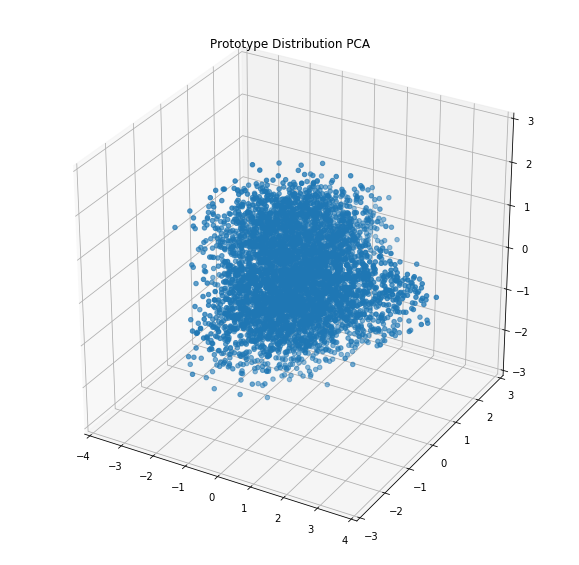

PCA: Explained variance ratio: [0.07125143 0.05078241]


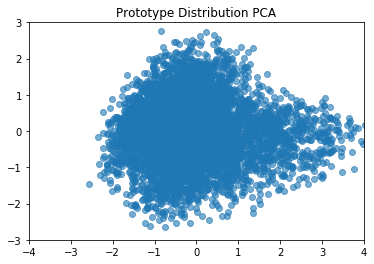

In [2]:
weight = 'k_k60_epoch600'

# NORMAL
print(weight)
prototypes = np.load(f'results/prototypes_PTA_{weight}.npy')
X_pca = plot_prototype_3d_space_distribution(prototypes)
X_pca = plot_prototype_2d_space_distribution(prototypes)

In [13]:
test_dists = np.load(f'results/test_dists_PTTA_{weight}.npy')
np_describe(test_dists)
prepare_submission(weight, test_dists, data_test=DATA_PATH+'/test',
                   classes=get_classes(data=DATA_PATH), new_whale_thresh=-11)

k_k60_epoch600 0.3060301507537688 3654


,Image,Id
0,00028a005.jpg,w_dec7ffd new_whale w_df6b050 w_b5c3634 w_22d96e7
1,000dcf7d8.jpg,w_4132bb8 new_whale w_df6b050 w_08c7d09 w_e8ab3c8
2,000e7c7df.jpg,w_94c3bf0 new_whale w_9ba4a9a w_38fc953 w_d066c0a
3,0019c34f4.jpg,w_a335fc2 w_c99807e new_whale w_2ec0a71 w_8b86b95
4,001a4d292.jpg,new_whale w_ecf39ca w_9e18daa w_ab41d9b w_e8c45dd


In [14]:
submission_filename = weight
!kaggle competitions submit -c humpback-whale-identification -f subs/{submission_filename}.csv.gz -m "POST {submission_filename}"

100%|████████████████████████████████████████| 182k/182k [00:08<00:00, 23.0kB/s]
Successfully submitted to Humpback Whale Identification